In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer
import pickle

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

In [3]:
from test_convnet_optimizer import TestConvNet

In [6]:
test_convnet_list = []
trainer_list = []
for optimizer in ['Adam', 'SGD', 'Adagrad', 'Momentum']:
    network = TestConvNet()
    network.load_params("test_convnet_" + optimizer.lower() + "_params.pkl")
    test_convnet_list.append(network)
    with open("trainer_" + optimizer.lower() + ".pkl", 'rb') as f:
        trainer = pickle.load(f)
    trainer_list.append(trainer)

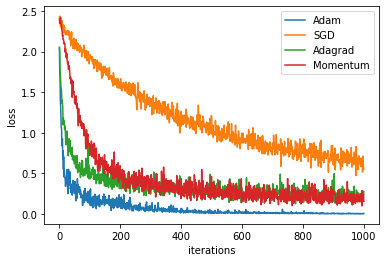

In [16]:
for i, optimizer in enumerate(['Adam', 'SGD', 'Adagrad', 'Momentum']):
    trainer = trainer_list[i]
    plt.plot(trainer.train_loss_list, label=optimizer)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

In [23]:
def show_accuracy_history(title, trainer):
    plt.title(title)
    plt.plot(trainer.train_acc_list, label='train', marker='o', markevery=2)
    plt.plot(trainer.test_acc_list, label='test', marker='s', markevery=2)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

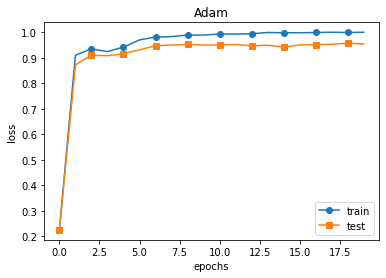

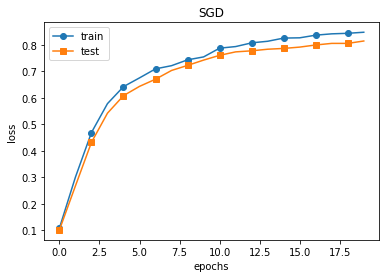

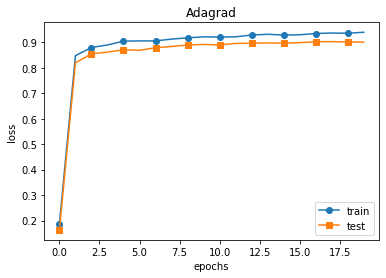

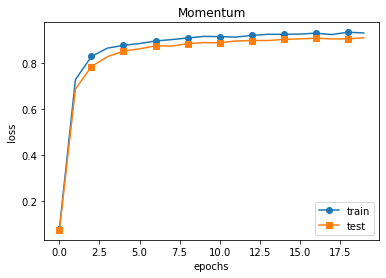

Adam : 0.955
SGD : 0.817
Adagrad : 0.907
Momentum : 0.913


In [24]:
for i, optimizer in enumerate(['Adam', 'SGD', 'Adagrad', 'Momentum']):
    trainer = trainer_list[i]
    show_accuracy_history(optimizer, trainer)
    
for i, optimizer in enumerate(['Adam', 'SGD', 'Adagrad', 'Momentum']):
    network = test_convnet_list[i]
    print(optimizer + " : " + str(network.accuracy(x_test, t_test)))